### Creemos una red y vayamos aumentando la cantidad de capas

El objetivo es crear redes con una cantidad incremental de capas. Vamos a fitear los modelos a las función sen(x). Cada ejemplo del dataset toma es un array con 10 números generados con distribución normal. La función a aprender es la que aplica sen(x) elemento a elemento.



In [1]:
import math
import tensorflow as tf

def sin():
    while True:
        x = tf.random.normal((32, 10), math.pi, 1.5)
        y = tf.math.sin(x)
        yield (x, y)


dts = tf.data.Dataset.from_generator(sin, (tf.float32, tf.float32), ((32, 10), (32, 10)))


Generamos datasets de 32 ejemplos:

In [2]:
x,y = list(dts.take(1).as_numpy_iterator())[0]

In [3]:
print(x[0])
print(y[0])
print(tf.math.sin(x[0]))

[0.03625894 2.4656017  1.225605   5.2262278  4.725089   2.8182907
 4.825955   5.9765816  4.709503   5.0155554 ]
[ 0.03625099  0.6256707   0.9410107  -0.8708641  -0.99991935  0.31769916
 -0.9935583  -0.3018225  -0.9999958  -0.95439595]
tf.Tensor(
[ 0.03625099  0.6256707   0.9410107  -0.8708641  -0.99991935  0.31769916
 -0.9935583  -0.3018225  -0.9999958  -0.95439595], shape=(10,), dtype=float32)


In [4]:
n_capas = 25

import numpy as np
def build_model(n):
    x = inputs = tf.keras.Input((10, ))
    # agregamos n capas de 10 unidades ocultas
    for _ in range(n):
        x = tf.keras.layers.Dense(10, activation="relu")(x)
    x = tf.keras.layers.Dense(10)(x) # capa densa final
    model = tf.keras.Model(inputs, x)
    model.compile("adam", "mse")
    return model

print("Red Neuronal 'normal'")
loss_history = []
for t in range(1, n_capas + 1):
    plain = build_model(t)
    print(plain.summary())
    hist = plain.fit(dts, steps_per_epoch=20, epochs=20*t, verbose=0)
    loss_history.append(hist.history["loss"][-1])
    print(hist.history["loss"][-1])

Red Neuronal 'normal'
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 10)]              0         
_________________________________________________________________
dense (Dense)                (None, 10)                110       
_________________________________________________________________
dense_1 (Dense)              (None, 10)                110       
Total params: 220
Trainable params: 220
Non-trainable params: 0
_________________________________________________________________
None
0.49255308508872986
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 10)]              0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                110       

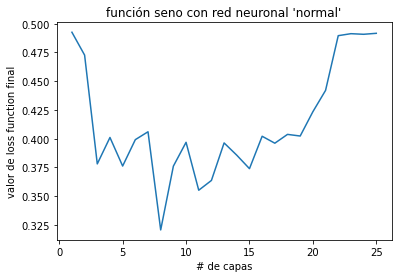

In [5]:
import matplotlib.pyplot as plt
plt.plot(range(1, n_capas + 1), loss_history)
plt.title("función seno con red neuronal 'normal'")
plt.xlabel("# de capas")
plt.ylabel("valor de loss function final")
plt.show()


In [6]:
def resblock(inputs):
  x = tf.keras.layers.Dense(10, activation="relu")(inputs)
  x = tf.keras.layers.Dense(10)(x)
  x = x + inputs # 'skip' en la conexión
  x = tf.keras.layers.Activation("relu")(x)
  return x

def build_resnet_model(n): # hacemos una resnet con n capas
    x = inputs = tf.keras.Input((10, ))
    x = tf.keras.layers.Dense(10, activation='relu')(x)

    # cada bloque residual tiene dos capas
    for _ in range((n-2)//2):
        x = resblock(x)

    x = tf.keras.layers.Dense(10)(x)

    model = tf.keras.Model(inputs, x)
    model.compile("adam", "mse")
    return model

resnet_loss_history = []
print("Red Neuronal residual")
for t in range(2, n_capas + 1, 2):
    resnet = build_resnet_model(t)
    print(resnet.summary())
    hist = resnet.fit(dts, steps_per_epoch=20, epochs=20*t, verbose=0)
    resnet_loss_history.append(hist.history["loss"][-1])
    print(resnet_loss_history[-1])

Red Neuronal residual
Model: "model_25"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_26 (InputLayer)        [(None, 10)]              0         
_________________________________________________________________
dense_350 (Dense)            (None, 10)                110       
_________________________________________________________________
dense_351 (Dense)            (None, 10)                110       
Total params: 220
Trainable params: 220
Non-trainable params: 0
_________________________________________________________________
None
0.4221341013908386
Model: "model_26"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_27 (InputLayer)           [(None, 10)]         0                                            
_____________________________

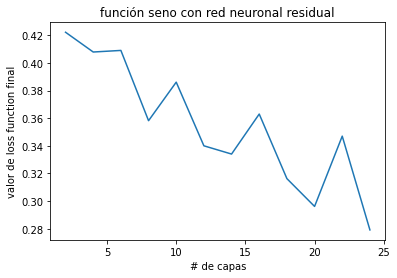

In [7]:

plt.plot(range(2, n_capas+1, 2), resnet_loss_history)
plt.title("función seno con red neuronal residual")
plt.xlabel("# de capas")
plt.ylabel("valor de loss function final")
plt.show()


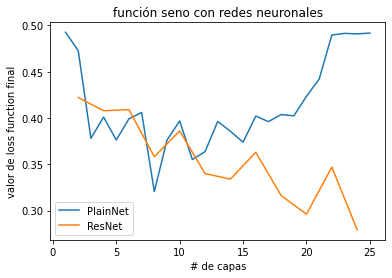

In [8]:

plt.plot(range(1, n_capas+1), loss_history, label="PlainNet")
plt.plot(range(2, n_capas+1, 2), resnet_loss_history, label="ResNet")
plt.title("función seno con redes neuronales")
plt.xlabel("# de capas")
plt.ylabel("valor de loss function final")
plt.legend()
plt.show()